# maxcut
The maxcut problem is to see if you can cross as many edges as possible in a single stroke.

## Example
Let's solve a graph problem with five points and six edges. First, let's draw the graph.

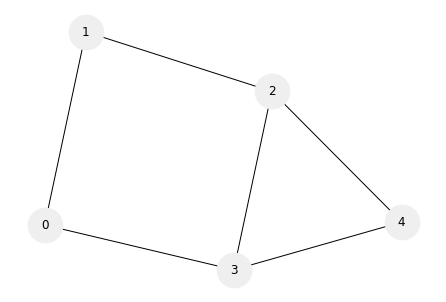

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

options = {'node_size': 1200,'with_labels':'True'}

G = nx.Graph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([(0,1),(0,3),(1,2),(2,3),(2,4),(3,4)])
nx.draw(G, **options, node_color='#efefef')

The hamiltonian of maxcut is

$$H = -\sum_{i,j}\frac{1}{2}(1-Z_iZ_j)$$

Z takes a value of 1 or -1, corresponding to the value of each vertex.

Substituting the values for all vertex relationships, we get

$$H = \frac{1}{2} \left\{ (Z_0Z_1-1) + (Z_0Z_3-1) + (Z_1Z_2-1) + (Z_2Z_3-1) + (Z_2Z_4-1) + (Z_3Z_4-1)\right\}$$

Ignoring the coefficients and constants, we get

$$H = Z_0Z_1 + Z_0Z_3 + Z_1Z_2 + Z_2Z_3 + Z_2Z_4 + Z_3Z_4$$

## Solving with a simulator
Here, we will use the variational solver function of blueqat to solve the problem on a simulator.

(((1, 0, 1, 0, 0), 0.11303718052819085), ((0, 1, 0, 1, 1), 0.11303718052819085), ((0, 1, 0, 1, 0), 0.11303718052819084), ((1, 0, 1, 0, 1), 0.11303718052819084), ((0, 0, 1, 1, 0), 0.07282344245085062), ((1, 1, 0, 0, 1), 0.07282344245085062), ((1, 0, 1, 1, 0), 0.04290170814994225), ((0, 1, 1, 1, 0), 0.04290170814994225), ((1, 0, 0, 0, 1), 0.04290170814994225), ((0, 1, 0, 0, 1), 0.04290170814994225), ((0, 1, 1, 0, 0), 0.028329754742647838), ((1, 0, 0, 1, 1), 0.028329754742647838))


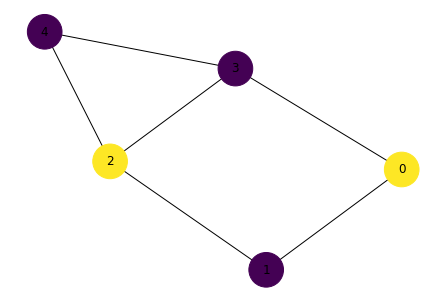

In [2]:
from blueqat import vqe
from blueqat.pauli import Z

hamiltonian = Z[0]*Z[1] + Z[0]*Z[3] + Z[1]*Z[2] + Z[2]*Z[3] + Z[2]*Z[4] + Z[3]*Z[4]
step = 2

result = vqe.Vqe(vqe.QaoaAnsatz(hamiltonian, step)).run()
print(result.most_common(12))

nx.draw(G, node_color=result.most_common()[0][0],**options)

The edges between the vertices of different colors will be cut.

## Solve using IonQ and Rigetti
To solve problems on a quantum computer, you need to register for an account on blueqat and get credit for the actual machine. Please obtain an API key from the setting screen and run it.

To solve a problem with a quantum computer, you need to wait for the computer to run. In some cases, the waiting time can be several hours.

In [2]:
from bqcloud import load_api
from blueqat import Circuit
from bqcloud import Device

api = load_api()

In [5]:
# Circuit, Device, Number of shots, Group name(Optional) for IonQ
task_ionq = api.execute(result.circuit, Device.IonQDevice, 10)

# Circuit, Device, Number of shots, Group name(Optional) for Rigetti
task_rigetti = api.execute(result.circuit, Device.Aspen11, 10)